# Sales Prediction Using Python

In this project We'll use linear regression and other machine learning techniques to predict sales accurately by considering the marketting techniques which are advertising on tv, radio and newspapers.
The dataset is taken from https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input

In [511]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [512]:
df=pd.read_csv("advertising.csv")

## Inspecting and cleaning the dataset

In [513]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [514]:
df.tail(5)

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [515]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [516]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [518]:
df.shape

(200, 4)

### Checking if outliers are present

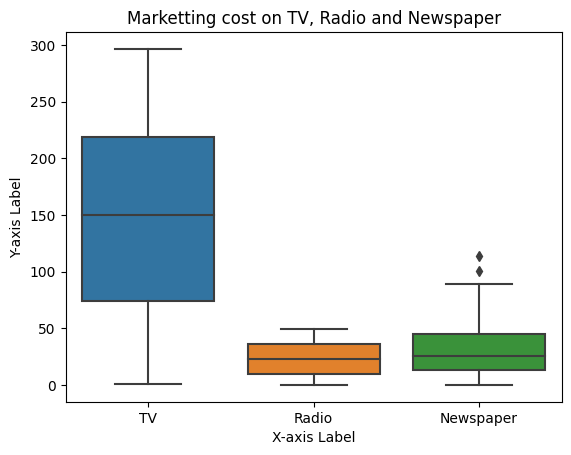

In [519]:
sns.boxplot(df[["TV","Radio","Newspaper"]])
plt.title('Marketting cost on TV, Radio and Newspaper')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()


Here, we can see 2 outliers in Newspaper column. Let's remove it

In [520]:
def remove_outliers(Newspaper):
    Q1 = df["Newspaper"].quantile(0.25)
    Q3 = df["Newspaper"].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df["Newspaper"] >= lower_bound) & (df["Newspaper"] <= upper_bound)]

# Remove outliers from 
df = remove_outliers(df["Newspaper"])

In [521]:
df.shape

(198, 4)

<AxesSubplot:>

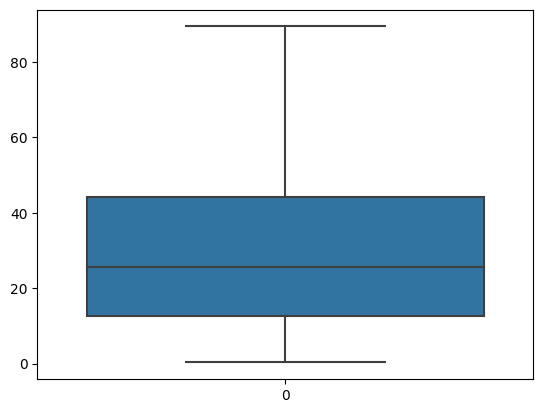

In [522]:
sns.boxplot(df["Newspaper"])

Let's visualise each columns in the dataset

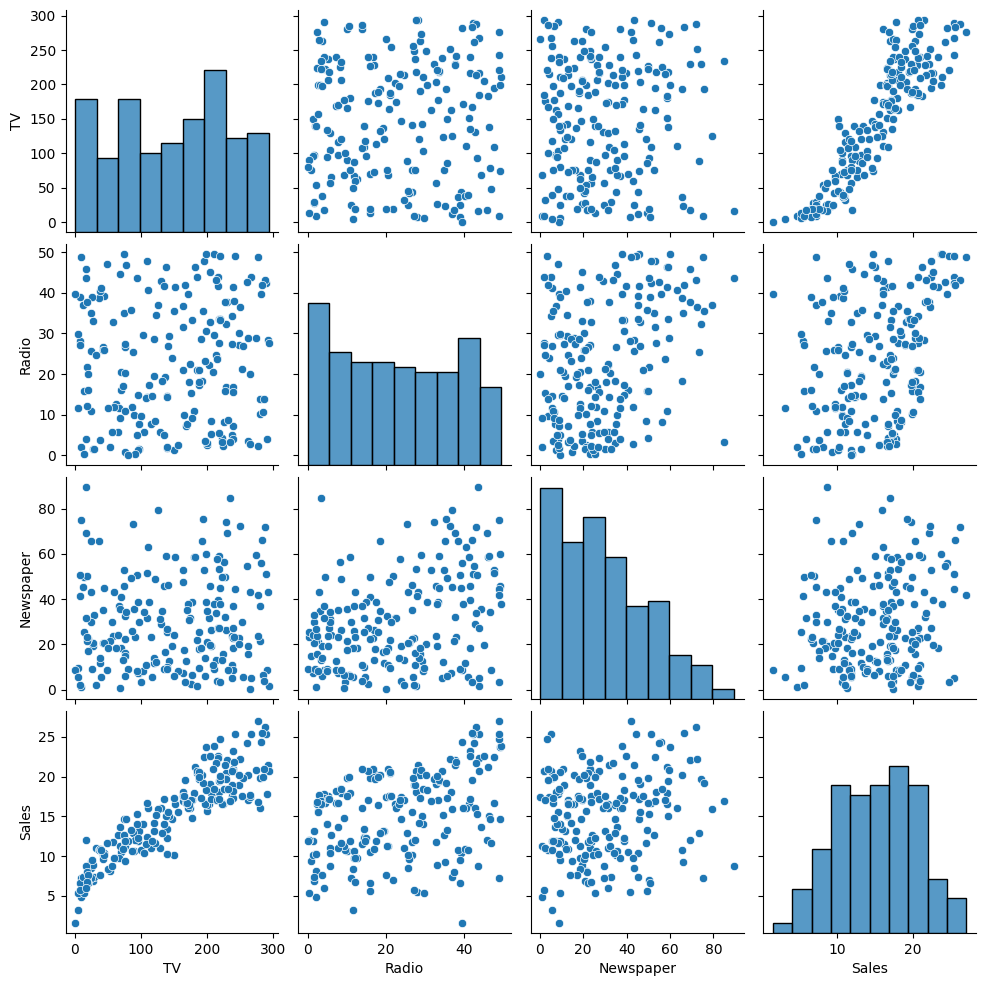

In [523]:
sns.pairplot(df)

#### Here, we can see TV and sales has the most positive linear correlation.

Lets visualize with regression line on each columns with Sales(Target variable)

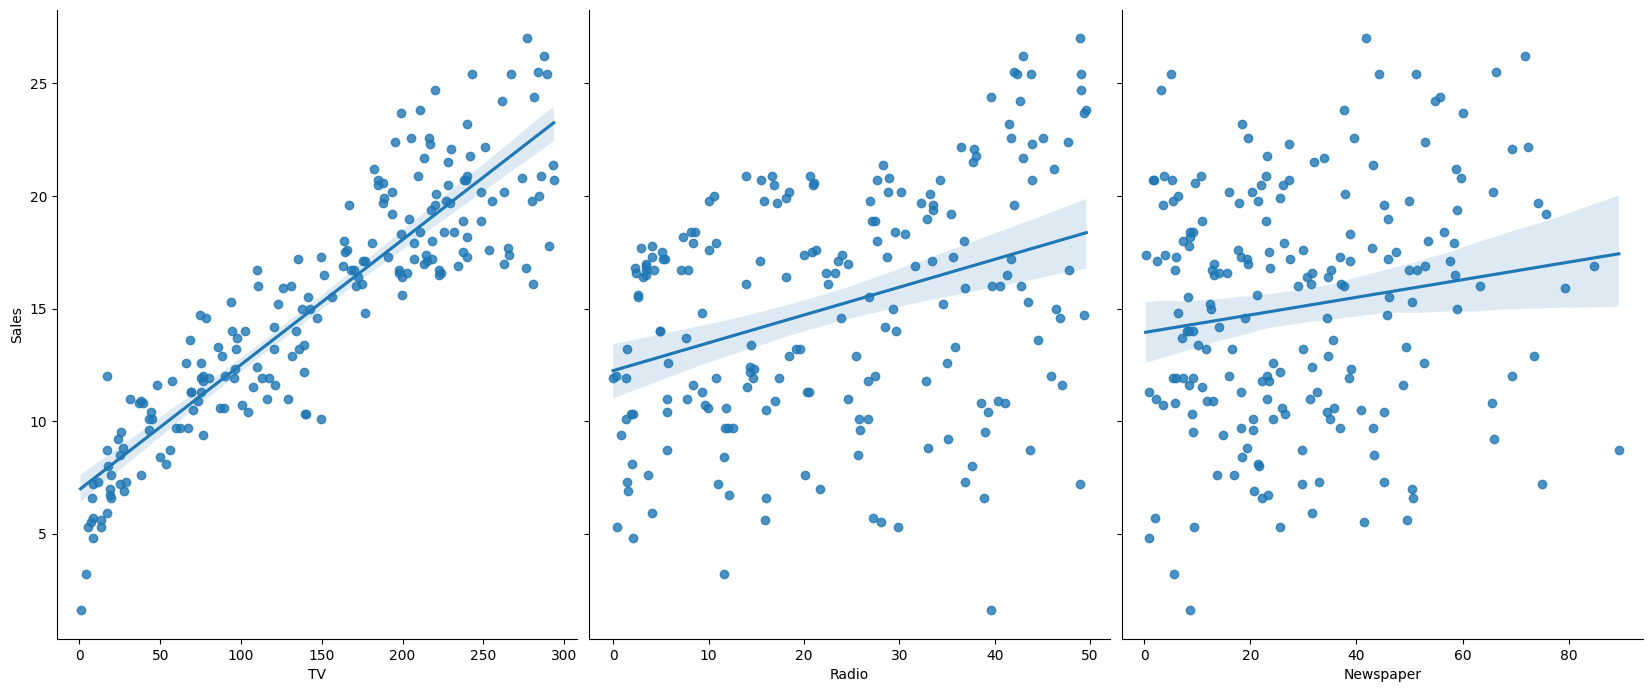

In [524]:
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=7, aspect=0.8, kind='reg')

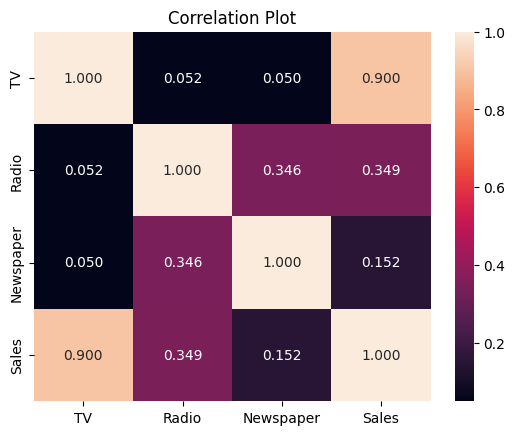

In [525]:
sns.heatmap(df.corr(), annot=True, fmt=".3f")
plt.title("Correlation Plot")
plt.show()

Here we can see, some positive correlation between the each columns tv,radio and newspaper  with sales. Where correaltion value
are 0.900, 0.349, 0.152 respectively. here we can see that Newspaper is least affecting factors in sales. So we will not use newspaper column for modelling.

## Preparing Model

In [526]:
X = df[["TV","Radio"]]
y = df["Sales"]

In [531]:
X.head()

,TV,Radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [533]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

In [534]:
from sklearn.model_selection import train_test_split

In [535]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [536]:
X_train.head(5)

,TV,Radio
54,262.7,28.8
199,232.1,8.6
197,177.0,9.3
136,25.6,39.0
106,25.0,11.0


## Linear Regression

In [560]:
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()
linReg.fit(X_train,y_train)

LinearRegression()

In [561]:
#Getting the y-intercept and coefficients for tv, radio and newspaper respectively
print(linReg.intercept_)
print(linReg.coef_)

4.855826099158829
[0.05442254 0.09397682]


In [562]:
y_pred=linReg.predict(X_test)

#### Evaluating the model
 Using RMSE:Root Mean Squared Error and R2_score

In [563]:
from sklearn.metrics import mean_squared_error, r2_score

In [564]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))
print("R2 score : %.2f" % r2_score(y_test,y_pred))

Mean squared error: 2.72
R2 score : 0.90


### Checking the occurance of overfitting and underfitting

In [565]:
y_predtrainlr=linReg.predict(X_train)

In [566]:
print("Mean squared error: %.2f" % mean_squared_error(y_train,y_predtrainlr))
print("R2 score : %.2f" % r2_score(y_train,y_predtrainlr))

Mean squared error: 2.79
R2 score : 0.90


Since there is not any vast difference between the MSE and R2 score with train and test set. 
So we can say that the model is neither overfitting not underfitting.

## RandomForestRegressor

In [544]:
from sklearn.ensemble import RandomForestRegressor

In [545]:
rfRegres=RandomForestRegressor()
rfRegres.fit(X_train, y_train)

RandomForestRegressor()

In [546]:
y_pred_rf=rfRegres.predict(X_test)

Evaluating using Mean Squared Error, r2_score

In [547]:
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_rf))
print("R2 score : %.2f" % r2_score(y_test,y_pred_rf))

Mean squared error: 1.52
R2 score : 0.94


Hyperparameter tuning

In [548]:
rfRegres_ht=RandomForestRegressor(n_estimators=200, max_depth=15)
rfRegres_ht.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, n_estimators=200)

In [549]:
y_pred_rfht=rfRegres_ht.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_rfht))
print("R2 score : %.2f" % r2_score(y_test,y_pred_rfht))

Mean squared error: 1.49
R2 score : 0.94


#### It seems hyperparamater of n_estimators=200 and max_depth=15 give better results.

### Checking the occurance of overfitting and underfitting

In [573]:
y_predtrainrfr=rfRegres_ht.predict(X_train)

In [574]:
print("Mean squared error: %.2f" % mean_squared_error(y_train,y_predtrainrfr))
print("R2 score : %.2f" % r2_score(y_train,y_predtrainrfr))

Mean squared error: 0.23
R2 score : 0.99


The model is overfitting. As MSE on train data is very small compared to the test data. So we wond use this model for prediction.

## XBoost Regressor

In [567]:
from xgboost.sklearn import XGBRegressor

In [568]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_xgb))
print("R2 score : %.2f" % r2_score(y_test,y_pred_xgb))

Mean squared error: 1.41
R2 score : 0.95


### Checking the occurance of overfitting and underfitting

In [569]:
y_predtrainxb=xgb_model.predict(X_train)
print("Mean squared error: %.2f" % mean_squared_error(y_train,y_predtrainxb))
print("R2 score : %.2f" % r2_score(y_train,y_predtrainxb))

Mean squared error: 0.00
R2 score : 1.00


#### Tuning the parameters

In [555]:
xgb_model_ht = XGBRegressor(gamma= 0.1, learning_rate= 0.2, max_depth= 7, n_estimators= 40)
xgb_model_ht.fit(X_train, y_train)
y_pred_xgbht = xgb_model_ht.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred_xgbht))
print("R2 score : %.2f" % r2_score(y_test,y_pred_xgbht))

Mean squared error: 1.58
R2 score : 0.94


The model is overfitting. As MSE on train data is very small compared to the test data. So we will not use this model for prediction.

## Model Selection

#### The model shows consistent performance across both the training and test sets, with no significant disparity in Mean Squared Error (MSE) and R-squared (R2) scores. Therefore, there is no evidence of overfitting or underfitting. Given the good performance metrics ie MSE and R2 score, a linear regression model is more suitable for prediction.

#### i) Lower MSE values indicates that the model's predictions are closer to the actual values.
#### ii) Higher R2 score indicates a better fit of the regression model to the data.

## Prediction with LinearRegression Model

In [570]:
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [571]:
df.shape

(198, 4)

Let's predict the 2nd row sales

In [572]:
inputs = {
    "TV": [44.5],
    "Radio": [39.3]
}

sales_prediction = linReg.predict(pd.DataFrame(inputs))
print("Sales Predicted with RandomForestRegressor model:", sales_prediction[0])

Sales Predicted with RandomForestRegressor model: 10.97091835975769


#### Hence here, actual value is 10.4 and predicted value is 10.97 which is nearly accurate.